## Feature Transformation Using Sklearn with ANN

In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
# Load the dataset
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

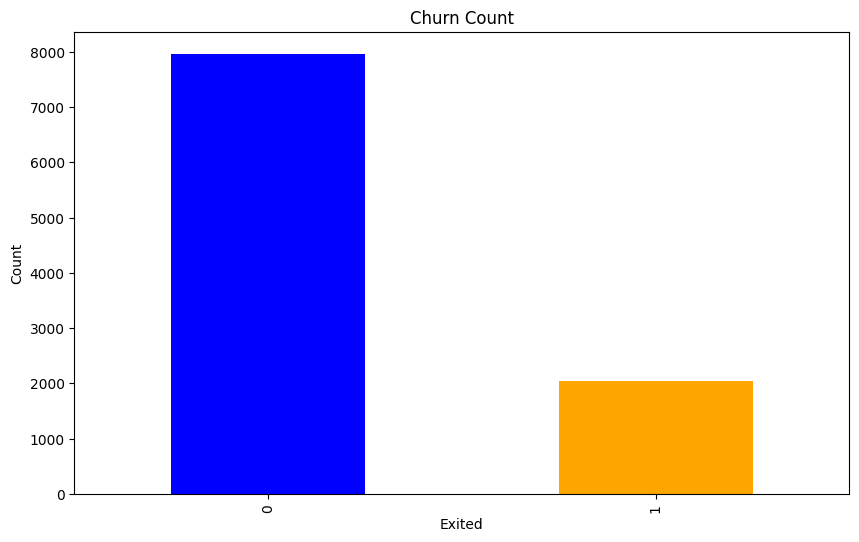

In [4]:
# visualize the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data["Exited"].value_counts().plot(kind="bar", color=["blue", "orange"])
plt.title("Distribution of Exited")
plt.title("Churn Count")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show()

In [5]:
# preprocess the data
# Drop unnecessary columns
data = data.drop(columns=["RowNumber", "CustomerId", "Surname"],axis=1)

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Encode categorical variables
label_encoder = LabelEncoder()
data["Gender"] = label_encoder.fit_transform(data["Gender"])

data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [7]:
# One-hot encode the categorical variables "Geography"
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo = OneHotEncoder()
geo_encoder = onehot_encoder_geo.fit_transform(data[["Geography"]]).toarray()
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [8]:
onehot_encoder_geo.get_feature_names_out(["Geography"])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [9]:
geo_encoded_df = pd.DataFrame(geo_encoder, columns=onehot_encoder_geo.get_feature_names_out(["Geography"]))
geo_encoded_df.head()

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [10]:
# combine the encoded columns with the original dataframe
data = pd.concat([data.drop(columns=["Geography"]), geo_encoded_df], axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [11]:
#save the encoder
with open("geo_encoder.pkl", "wb") as f:
    pickle.dump(onehot_encoder_geo, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

In [12]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [13]:
# Divide the data into features and target variable
x = data.drop(columns=["Exited"])
y = data["Exited"]

In [14]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0


In [15]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [16]:
#split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

In [18]:
# scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
x_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [20]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# ANN Implementation

In [21]:
!pip install tensorflow

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [23]:
#X_train.shape is usually a numpy array or tensor representing the training data.
 
(x_train.shape[1],)

(12,)

In [24]:
# Build the ANN model
model = Sequential(
    [   # hidden layer connected to the input layer, 64 neurons, relu activation function,input shape is the number of features in the training data
        Dense(64, activation="relu", input_shape=(x_train.shape[1],)),

        # hidden layer 2 connected to the hidden layer 1, 32 neurons, relu activation function
        Dense(32, activation="relu"),

        #output layer connected to the hidden layer 2, 1 neuron, sigmoid activation function
        Dense(1, activation="sigmoid") 
])

c:\ML project\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model

<Sequential name=sequential, built=True>

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# initalize Optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.BinaryCrossentropy()

In [28]:
#compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [29]:
# set up tensorboard
#create a directory for the logs
#log_dir stores information about the training process, such as the loss and accuracy of the model on the training and validation sets.
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# tensorboard uses the log_dir information to create visualizations of the training process. 
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


In [30]:
tensorboard_callback

In [31]:
log_dir

'logs/fit/20250515-151338'

In [32]:
# set up early stopping
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Train The Model

In [33]:
#model training
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, callbacks=[tensorboard_callback, early_stopping_callback])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7280 - loss: 0.5281 - val_accuracy: 0.8185 - val_loss: 0.4108
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8265 - loss: 0.4102 - val_accuracy: 0.8405 - val_loss: 0.3715
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8475 - loss: 0.3752 - val_accuracy: 0.8505 - val_loss: 0.3541
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8616 - loss: 0.3380 - val_accuracy: 0.8535 - val_loss: 0.3482
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8484 - loss: 0.3551 - val_accuracy: 0.8555 - val_loss: 0.3488
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8608 - loss: 0.3364 - val_accuracy: 0.8570 - val_loss: 0.3474
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8580 - loss: 0.3413 - val_accuracy: 0.8575 - val_loss: 0.3476
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8635 - loss: 0.3294 - val_

In [34]:
# save the model
model.save("model1.h5")

In [35]:
# Load TensorBoard extension
%load_ext tensorboard


In [38]:
# start TensorBoard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 14688), started 15:31:49 ago. (Use '!kill 14688' to kill it.)